Text(0.5,1,'Data from R.J.Gladstone study, 1905')

Text(0.5,0,'Head size, cm^3')

Text(0,0.5,'Brain weight (grams) ')

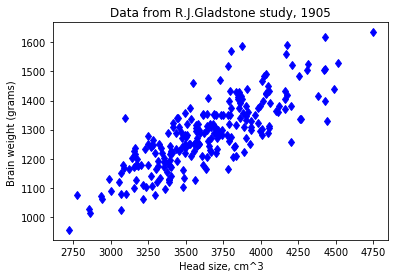

In [265]:
# linear_regression.m.
# Kiran Gunnam
# 

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
import matplotlib.patches as mpatches



#Dataset:  brainhead.txt
#Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
#to the Size of the Head", Biometrika, Vol. 4, pp105-123
#Description: Brain weight (grams) and head size (cubic cm) for 237
#adults 
#Variables
#First column Head size (cm^3)  
#Second column Brain weight (grams)  

br=np.loadtxt("brainhead.txt")


br_x=br[:,0]    # x independent variable/experimental variable/predictor variable,  (head size )
br_y=br[:,1]    # y dependent variable/outcome variable (Brain weight )
n=np.size(br_y) # data size


plt.plot(br_x,br_y,'bd')              # Plot the data; marker 'bd' =blue diamonds
plt.title ('Data from R.J.Gladstone study, 1905')
plt.xlabel('Head size, cm^3');        # Set the x-axis label
plt.ylabel('Brain weight (grams) ');  # Set the y-axis label
plt.show()                            #hold on retains the current plot and certain 


Text(0.5,1,'Data from R.J.Gladstone study, 1905')

Text(0.5,0,'Head size, cm^3')

Text(0,0.5,'Brain weight (grams) ')

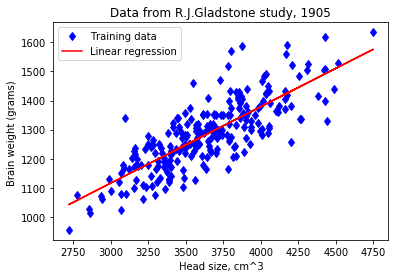

In [280]:
#Now, we want to allow a non-zero intercept for our linear equation. 
#That is, we don't want to require that our fitted equation go through the origin. 
#In order to do this, we need to add a column of all ones to our x column.#

# To make sure that regression line does not go through origin
# add a column of all ones (intercept term) to x
# BR_X = [ones(n, 1) br_x];
BR_X = np.vstack([br_x, np.ones(len(br_x))]).T
# and compare the results.

# Given a matrix equation
# X * theta=y, 
# the normal equation is that which minimizes the sum of the square differences 
# between the left and right sides:
# X'*X*theta=X'*y. 
# It is called a normal equation because y-X*theta is normal to the range of X.
# Here, X'*X is a normal matrix.

# Putting that into Octave:
# Calculate theta
# theta = (pinv(X'*X))*X'*y

# Or simply use backward slice operator
theta = lin.lstsq(BR_X,br_y)[0]  

#minimize norm(X*theta-y) via a QR factorization
# we can also use the equivalent command 
# theta=mldivide(X,y)
# You should get theta = [ 325.57342 0.26343]. 
# This means that our fitted equation is as follows: 
# y = 0.26343x + 325.57342.


theta1= np.ones(len(BR_X))
theta1= theta1*theta[1]
br_y_est=np.add(BR_X[:,0]*theta[0],theta1) ;

# Now, let's plot our fitted equation (prediction) on top 
# of the training data, to see if our fitted equation makes 
# sense.

# Plot the fitted equation we got from the regression

#tr_plot=plt.plot(br_x,br_y,'rd',label='Training data')
#lin_reg= plt.plot(br_x,br_y_est,'b-', label='Linear Regression')          # Plot the data; marker 'bd' =blue diamonds

plt.plot(br_x,br_y,'bd',br_x,br_y_est,'r-')
plt.title ('Data from R.J.Gladstone study, 1905')
plt.xlabel('Head size, cm^3');    # Set the x-axis label
plt.ylabel('Brain weight (grams) ');  # Set the y-axis label

plt.legend(('Training data','Linear regression'),loc='upper left')
plt.show()                            #hold on retains the current plot and certain 


In [267]:
# Evaluate each fit you make in the context of your data. For example, 
# if your goal of fitting the data is to extract coefficients that have 
# physical meaning, then it is important that your model reflect the 
# physics of the data. Understanding what your data represents, 
# how it was measured, and how it is modeled is important when evaluating 
# the goodness of fit.

# One measure of goodness of fit is the coefficient of determination, 
# or R^2 (pronounced r-square). This statistic indicates how closely 
# values you obtain from fitting a model match the dependent variable 
# the model is intended to predict. Statisticians often define R^2 
# using the residual variance from a fitted model:
# R^2 = 1 – SSresid / SStotal
# SSresid is the sum of the squared residuals from the regression. 
# SStotal is the sum of the squared differences from the mean 
# of the dependent variable (total sum of squares). Both are positive scalars.
# Residuals are the difference between the observed values of the response (dependent)
# variable and the values that a model predicts. When you fit a model that is 
# appropriate for your data, the residuals approximate independent random errors. 
# That is, the distribution of residuals ought not to exhibit a discernible pattern.
# Producing a fit using a linear model requires minimizing the sum of the squares
# of the residuals. This minimization yields what is called a least-squares fit. 
# You can gain insight into the "goodness" of a fit by visually examining a plot 
# of the residuals. If the residual plot has a pattern (that is, residual data
# points do not appear to have a random scatter), the randomness indicates
# that the model does not properly fit the data.

# The higher the value of R-square , the better the model is at predicting the data.
# Say if Rsq is 0.7, we can say that 70% of the variation in dependent
# variable is explained by the independent variable.

residuals=br_y-br_y_est
Rsq = 1 - sum(residuals**2)/sum((br_y - np.mean(br_y))**2)


In [268]:
# also examine mean and standard deviation of residuals.
mean_residuals=np.mean(residuals)
std_residuals=np.std(residuals)

Text(0.5,0,'data index')

Text(0,0.5,'residuals')

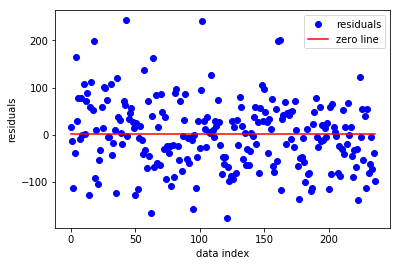

In [282]:
x_range= range(0,n)
ref=np.ones(n)
plt.plot(x_range,residuals,'bo',x_range,ref,'r-')
plt.xlabel('data index')
plt.ylabel('residuals')

plt.legend(('residuals','zero line'), loc='upper right')
plt.show()